# MODIS Extract

In [16]:
%matplotlib notebook

In [19]:
# import
from matplotlib import pyplot as plt

from scipy.ndimage import uniform_filter

from ulmo.preproc import extract
from ulmo import io as ulmo_io
from ulmo.preproc import utils as pp_utils

# Load image

In [23]:
filename = '/home/xavier/Projects/Oceanography/AI/OOD/A2010059070500.L2_LAC_SST.nc'

# Setup

In [24]:
field_size=(128,128)
nadir_offset=480
CC_max=0.05
qual_thresh=2
temp_bounds = (-2, 33)

In [25]:
# Load the image
sst, qual, latitude, longitude = ulmo_io.load_nc(filename, verbose=False)

# Generate the masks
masks = pp_utils.build_mask(sst, qual, qual_thresh=qual_thresh,
                            temp_bounds=temp_bounds)

# Restrict to near nadir
nadir_pix = sst.shape[1] // 2
lb = nadir_pix - nadir_offset
ub = nadir_pix + nadir_offset
sst = sst[:, lb:ub]
masks = masks[:, lb:ub]

# Extract rows,cols

In [26]:
%timeit rows, cols, clear_fracs = extract.random_clear(masks, field_size[0], CC_max=CC_max, nran_draw=1)

44 ms ± 987 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Plot

In [27]:
CC_mask = uniform_filter(masks.astype(float), 128, mode='constant', cval=1.)

<IPython.core.display.Javascript object>


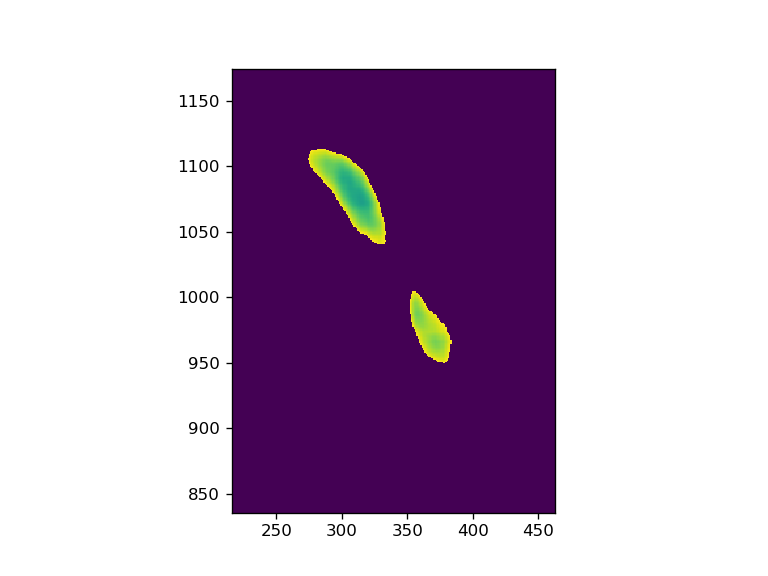

In [29]:
plt.clf()
plt.imshow(CC_mask * (CC_mask < 0.05), origin='lower')
plt.show()